In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.markers as mmark

In [2]:
plt.rcParams.update({'font.family': 'cmr10',
                     'font.size': 12,
                     'axes.unicode_minus': False,
                     'axes.labelsize': 12,
                     'axes.labelsize': 12,
                     'figure.figsize': (4, 4),
                     'figure.dpi': 160,
                     'mathtext.fontset': 'cm',
                     'mathtext.rm': 'serif',
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'xtick.top': True,
                     'ytick.right': True
                     })

In [3]:
top_medians = pd.read_csv('../data/ModelsToSecretResults.csv')

In [4]:
top_medians_top = top_medians[top_medians['MedianTotalImprovement'] > 2]
top_medians_compare = top_medians[top_medians['MedianTotalImprovement'] <= 2]

In [5]:
SI_DF = pd.read_csv('../data/Metric_Scores.csv', index_col=0)

In [6]:
SI_DF.sort_values(by='MedianSigI', ascending=False)

,Model,MinSigI,MaxSigI,MedianSigI
20,Combined-OR-DeepSVDD_MSE-Flow,0.183150,100.000000,19.022801
0,DeepSetVAE_weight_1.0,0.000000,99.111257,4.267101
17,Combined-AVG-VAE_beta1_z21-Flow,0.036630,99.103793,3.208368
23,Combined-PROD-VAE_beta1_z21-Flow,0.036630,99.103793,3.201316
16,Combined-AND-VAE_beta1_z21-Flow,0.036630,99.082951,2.976848
3,SimpleAE,0.231669,81.554815,2.622997
19,Combined-AVG-DeepSVDD_MSE-Flow,0.018315,97.558524,2.309711
18,Combined-AND-DeepSVDD_MSE-Flow,0.018315,96.905859,2.264734
1,DeepSetVAE_weight_10.0,0.000000,88.018433,2.025603
22,Combined-OR-VAE_beta1_z21-Flow,0.018315,93.493151,1.900374


In [7]:
SI_DF['ShortName'] = [x.replace('_', '$\_$').replace('\_', '_').replace('$_$','$\_$').replace('$\_$MSE-Flow', '-Flow') for x in SI_DF['Model']]

In [8]:
name_dictionary = {
    'Flow-Efficient$\\_$Likelihood': 'Flow-Efficient_Likelihood',
    'Combined-AND-DeepSVDD-Flow': 'Combined-AND-DeepSVDD_MSE-Flow',
    'Combined-AVG-DeepSVDD-Flow': 'Combined-AVG-DeepSVDD_MSE-Flow',
    'Flow-Efficient-No-E$\\_$Likelihood': 'Flow-Efficient-No-E_Likelihood',
    'Combined-PROD-DeepSVDD-Flow': 'Combined-PROD-DeepSVDD_MSE-Flow',
    'Combined-AND-VAE$\\_$beta1$\\_$z21-Flow': 'Combined-AND-VAE_beta1_z21-Flow',
    'Combined-OR-DeepSVDD-Flow': 'Combined-OR-DeepSVDD_MSE-Flow',
    'Combined-OR-VAE$\\_$beta1$\\_$z21-Flow': 'Combined-OR-VAE_beta1_z21-Flow',
    'Combined-AVG-VAE$\\_$beta1$\\_$z21-Flow': 'Combined-AVG-VAE_beta1_z21-Flow',
    'Combined-PROD-VAE$\\_$beta1$\\_$z21-Flow': 'Combined-PROD-VAE_beta1_z21-Flow',
    'DeepSetVAE$\\_$weight$\\_$10.0': 'DeepSetVAE_weight_10.0',
    'DeepSetVAE$\\_$weight$\\_$1.0': 'DeepSetVAE_weight_1.0',
    'ALAD$\\_$bs500$\\_$F': 'ALAD_bs500_F',
    'DAGMM$\\_$0.01': 'DAGMM_0.01',
    'DAGMM$\\_$0.001': 'DAGMM_0.001',
    'Planar': 'Planar',
    'VAE-dynamic-beta1-z13$\\_$Radius': 'VAE-dynamic-beta1-z13_Radius',
    'ALAD$\\_$bs5000$\\_$F': 'ALAD_bs5000_F',
    'KDE': 'KDE',
    'ALAD$\\_$bs5000$\\_$L1': 'ALAD_bs5000_L1',
    'ALAD$\\_$bs5000$\\_$L2': 'ALAD_bs5000_L2',
    'ALAD$\\_$bs5000$\\_$CH': 'ALAD_bs5000_CH',
    'ALAD$\\_$bs500$\\_$L1': 'ALAD_bs500_L1',
    'ALAD$\\_$bs500$\\_$CH': 'ALAD_bs500_CH',
    'SimpleAE': 'SimpleAE',
    'ALAD$\\_$bs500$\\_$L2': 'ALAD_bs500_L2',
    'ConvF' : 'ConvF'  
}

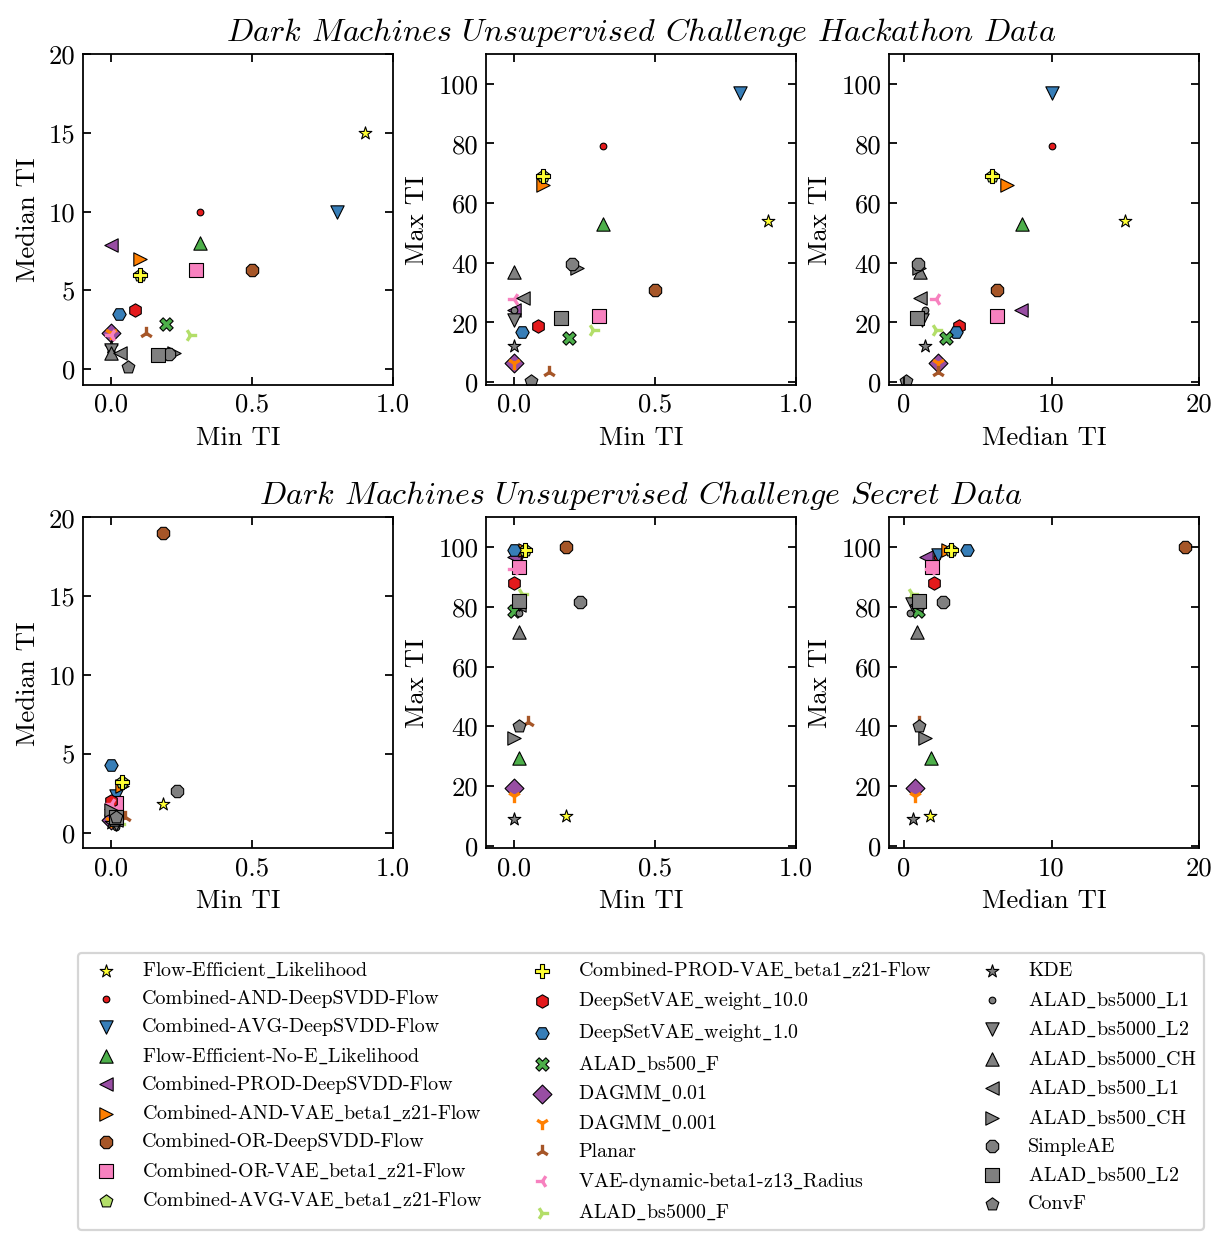

In [9]:
plt.figure(figsize=(9, 9.5))
plt.rcParams['text.usetex'] = False
# plt.rcParams['text.usetex'] = True
gs0 = gs.GridSpec(3, 1, height_ratios=[3, 3, 2], hspace=0.45)
gs00 = gs.GridSpecFromSubplotSpec(1, 3, gs0[0], wspace=0.3, hspace=0.3)
gs000 = gs.GridSpecFromSubplotSpec(1, 3, gs0[1], wspace=0.3, hspace=0.3)
i=3
lw=0.5
markerdict = {0: '*',
              1: '.',
              2: 'v',
              3: '^',
              4: '<',
              5: '>',
              6: '8',
              7: 's',
              8: 'p',
              9: 'P',
              10: 'h',
              11: 'H',
              12: 'X',
              13: 'D',
              14: '1',
              15: '2',
              16: '3',
              17: '4',
              18: '+',
             }
topcolors = ['#FFFF33','#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00','#A65628','#F781BF','#B3DE69']
#plot 1 of top_medians
plt.subplot(gs00[0])
for kk, mod in enumerate(list(top_medians_top['ShortName'])):
    tmpdf2=top_medians[top_medians['ShortName'] == mod]
    plt.scatter(tmpdf2['MinTotalImprovement'], tmpdf2['MedianTotalImprovement'], color=topcolors[kk%9],
                marker=markerdict[kk],
                linewidths=lw if kk < 14 else 1.5,
               edgecolor='k'
               )
for kk, mod in enumerate(list(top_medians_compare['ShortName'])):
    tmpdf2=top_medians[top_medians['ShortName'] == mod]
    plt.scatter(tmpdf2['MinTotalImprovement'], tmpdf2['MedianTotalImprovement'], color=f'grey',
                marker=markerdict[kk],
                linewidths=lw if kk < 14 else 1.5,
               edgecolor='k'
               )
plt.xlabel('Min TI')
plt.ylabel('Median TI')
plt.xlim([-0.1, 1])
plt.ylim([-1, 20])
#plot 2 of top_medians
ax1 = plt.subplot(gs00[1])
ax1.set_title(r'$Dark$ $Machines$ $Unsupervised$ $Challenge$ $Hackathon$ $Data$')
for kk, mod in enumerate(list(top_medians_top['ShortName'])):
    tmpdf2=top_medians[top_medians['ShortName'] == mod]
    plt.scatter(tmpdf2['MinTotalImprovement'], tmpdf2['MaxTotalImprovement'], color=topcolors[kk%9], label=mod.replace('VAE_beta_1.0', '-Fixed KL').replace('_', r'$\_$').replace('+', '\n'),
                marker=markerdict[kk],
                linewidths=lw if kk < 14 else 1.5,
                edgecolor='k'
               )
for kk, mod in enumerate(list(top_medians_compare['ShortName'])):
    tmpdf2=top_medians[top_medians['ShortName'] == mod]
    plt.scatter(tmpdf2['MinTotalImprovement'], tmpdf2['MaxTotalImprovement'], color=f'grey',
                marker=markerdict[kk],
                linewidths=lw if kk < 14 else 1.5,
               edgecolor='k'
               )
# plt.yscale('symlog')
plt.xlabel('Min TI')
plt.ylabel('Max TI')
plt.xlim([-0.1, 1])
plt.ylim([-1, 110])
#plot 3 of top_medians
plt.subplot(gs00[2])
for kk, mod in enumerate(list(top_medians_top['ShortName'])):
    tmpdf2=top_medians[top_medians['ShortName'] == mod]
    plt.scatter(tmpdf2['MedianTotalImprovement'], tmpdf2['MaxTotalImprovement'],
                color=topcolors[kk%9],
                marker=markerdict[kk],
                linewidths=lw if kk < 14 else 1.5,
               edgecolor='k'
               )
for kk, mod in enumerate(list(top_medians_compare['ShortName'])):
    tmpdf2=top_medians[top_medians['ShortName'] == mod]
    plt.scatter(tmpdf2['MedianTotalImprovement'], tmpdf2['MaxTotalImprovement'], color=f'grey',
                marker=markerdict[kk],
                linewidths=lw,
               edgecolor='k'
               )
# plt.xscale('symlog')
# plt.yscale('symlog')
plt.xlabel('Median TI')
plt.ylabel('Max TI')
plt.xlim([-1, 20])
plt.ylim([-1, 110])
#plot 1 of secret
plt.subplot(gs000[0])
for kk, mod in enumerate(list(top_medians_top['ShortName'])):
    tmpdf2=SI_DF[SI_DF['Model'] == name_dictionary[mod]]
    plt.scatter(tmpdf2['MinSigI'], tmpdf2['MedianSigI'], color=topcolors[kk%9],
                marker=markerdict[kk],
                linewidths=lw if kk < 14 else 1.5,
               edgecolor='k'
               )
for kk, mod in enumerate(list(top_medians_compare['ShortName'])):
    tmpdf2=SI_DF[SI_DF['Model'] == name_dictionary[mod]]
    plt.scatter(tmpdf2['MinSigI'], tmpdf2['MedianSigI'], color=f'grey',
                marker=markerdict[kk],
                linewidths=lw if kk < 14 else 1.5,
               edgecolor='k'
               )
plt.xlabel('Min TI')
plt.ylabel('Median TI')
plt.xlim([-0.1, 1])
plt.ylim([-1, 20])
#plot 2 of secret
ax2=plt.subplot(gs000[1])
ax2.set_title(r'$Dark$ $Machines$ $Unsupervised$ $Challenge$ $Secret$ $Data$')
for kk, mod in enumerate(list(top_medians_top['ShortName'])):
    tmpdf2=SI_DF[SI_DF['Model'] == name_dictionary[mod]]
    plt.scatter(tmpdf2['MinSigI'], tmpdf2['MaxSigI'], color=topcolors[kk%9], label=mod.replace('VAE_beta_1.0', '-Fixed KL').replace('_', r'$\_$').replace('+', '\n'),
                marker=markerdict[kk],
                linewidths=lw if kk < 14 else 1.5,
                edgecolor='k'
               )
for kk, mod in enumerate(list(top_medians_compare['ShortName'])):
    tmpdf2=SI_DF[SI_DF['Model'] == name_dictionary[mod]]
    plt.scatter(tmpdf2['MinSigI'], tmpdf2['MaxSigI'], color=f'grey',
                marker=markerdict[kk],
                linewidths=lw if kk < 14 else 1.5,
               edgecolor='k'
               )
# plt.yscale('symlog')
plt.xlabel('Min TI')
plt.ylabel('Max TI')
plt.xlim([-0.1, 1])
plt.ylim([-1, 110])
#plot 3 of secret
plt.subplot(gs000[2])
for kk, mod in enumerate(list(top_medians_top['ShortName'])):
    tmpdf2=SI_DF[SI_DF['Model'] == name_dictionary[mod]]
    plt.scatter(tmpdf2['MedianSigI'], tmpdf2['MaxSigI'],
                color=topcolors[kk%9],
                marker=markerdict[kk],
                linewidths=lw if kk < 14 else 1.5,
               edgecolor='k'
               )
for kk, mod in enumerate(list(top_medians_compare['ShortName'])):
    tmpdf2=SI_DF[SI_DF['Model'] == name_dictionary[mod]]
    plt.scatter(tmpdf2['MedianSigI'], tmpdf2['MaxSigI'], color=f'grey',
                marker=markerdict[kk],
                linewidths=lw,
               edgecolor='k'
               )
# plt.xscale('symlog')
# plt.yscale('symlog')
plt.xlabel('Median TI')
plt.ylabel('Max TI')
plt.xlim([-1, 20])
plt.ylim([-1, 110])
#now the legend
plt.subplot(gs0[2])
for kk, mod in enumerate(list(top_medians_top['ShortName'])):
    tmpdf2=SI_DF[SI_DF['Model'] == name_dictionary[mod]]
#     mod = mod.replace("_","\_")
    plt.scatter([], [], color=topcolors[kk%9],
                marker=markerdict[kk],
                label=mod,
                linewidths=lw if kk < 14 else 1.5,
                edgecolor='k'
               )
for kk, mod in enumerate(list(top_medians_compare['ShortName'])):
    tmpdf2=SI_DF[SI_DF['Model'] == name_dictionary[mod]]
#     mod = mod.replace("_","\_")
    plt.scatter([], [], color=f'grey',
                marker=markerdict[kk],
                label=mod,
                linewidths=lw if kk < 14 else 1.5,
                edgecolor='k'
               )
plt.legend(fontsize=9,
           loc='center',
           ncol=3,
           labelspacing=0.5
          )
plt.axis('off')
# plt.savefig('Secret_SummaryOfSummaries_modelclustering.pdf', bbox_inches='tight')
plt.show()

In [10]:
print(top_medians.shape)
print(SI_DF.shape)

(27, 5)
(28, 5)


In [11]:
inner_models = top_medians.set_index('ShortName').join(other=SI_DF[['ShortName', 'MinSigI', 'MaxSigI', 'MedianSigI']].set_index('ShortName'),
                 how='inner',
                 on='ShortName'
                )

In [12]:
inner_models = inner_models.reset_index()

In [13]:
inner_models['ShortName'].sort_values()
print(inner_models.shape)

(27, 8)


In [14]:
markerdict = {0: '*',
              1: '.',
              2: 'v',
              3: '^',
              4: '<',
              5: '>',
              6: '8',
              7: 's',
              8: 'p',
              9: 'P',
              10: 'h',
              11: 'H',
              12: 'X',
              13: 'D',
              14: '1',
              15: '2',
              16: '3',
              17: '4',
              18: '+',
             }
topcolors = ['#FFFF33','#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00','#A65628','#F781BF','#B3DE69']

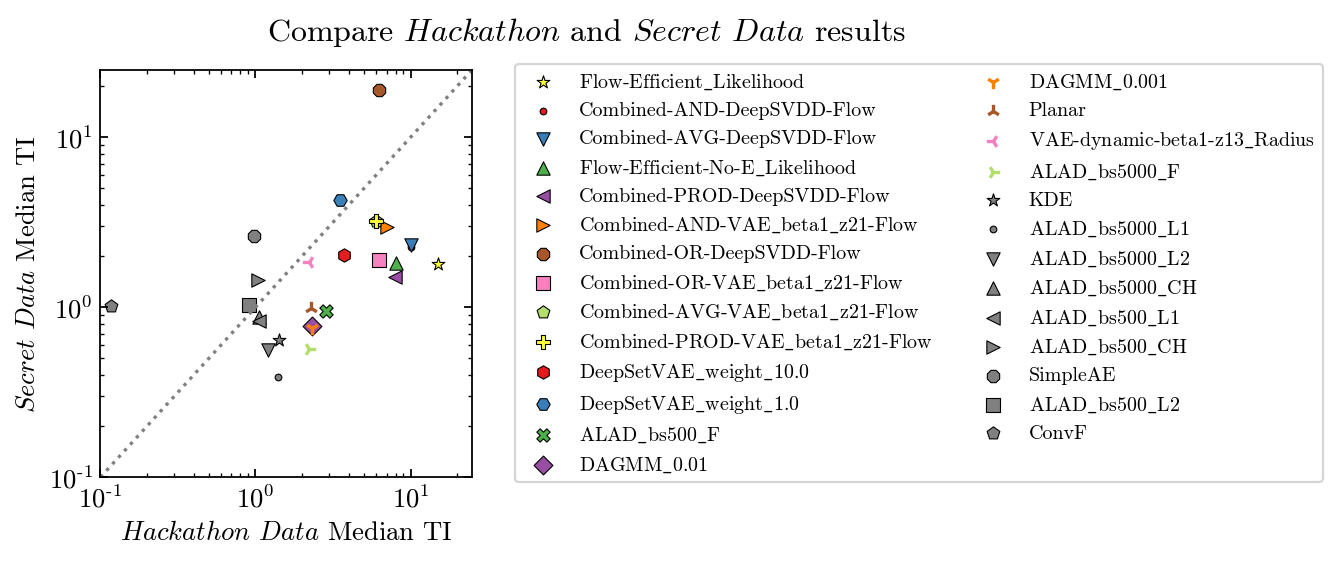

In [15]:
mult = 0.9
plt.figure(figsize=(9 * mult, 3.75 * mult))

gs0 = gs.GridSpec(1, 2, wspace=0.7, width_ratios=[1, 1])
# gs01 = gs.GridSpecFromSubplotSpec(1, 3, gs0[0], wspace=0.4)


plt.subplot(gs0[0])
plt.plot([0, 25], [0, 25], ls=':', color='grey')
for kk, mod in enumerate(list(top_medians_top['ShortName'])):
#     if mod not in list(inner_models['ShortName']): continue
    tmpdf2=inner_models[inner_models['ShortName'] == mod]
    plt.scatter(tmpdf2['MedianTotalImprovement'], tmpdf2['MedianSigI'],  
                color=topcolors[kk%9],
                marker=markerdict[kk],
                linewidths=lw if kk < 14 else 1.5,
                edgecolor='k' ,
                alpha=0.99
               )
    
for kk, mod in enumerate(list(top_medians_compare['ShortName'])):
    tmpdf2=inner_models[inner_models['ShortName'] == mod]
    plt.scatter(tmpdf2['MedianTotalImprovement'], tmpdf2['MedianSigI'],  
                color='grey',
                marker=markerdict[kk],
                linewidths=lw if kk < 14 else 1.5,
                edgecolor='k' 
               )
    
plt.minorticks_on()
plt.xlim(1e-1, 25)
plt.ylim(1e-1, 25)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$Hackathon$ $Data$ Median TI')
plt.ylabel(r'$Secret$ $Data$ Median TI')



plt.subplot(gs0[1])
for kk, mod in enumerate(list(top_medians_top['ShortName'])):
    tmpdf2=SI_DF[SI_DF['Model'] == mod]
#     print(mod)
#     mod = mod.replace("_","$\_$")
    plt.scatter([], [], color=topcolors[kk%9],
                marker=markerdict[kk],
                label=mod,
                linewidths=lw if kk < 14 else 1.5,
                edgecolor='k'
               )
for kk, mod in enumerate(list(top_medians_compare['ShortName'])):
    tmpdf2=SI_DF[SI_DF['Model'] == mod]
#     mod = mod.replace("_","$\_$")
    plt.scatter([], [], color=f'grey',
                marker=markerdict[kk],
                label=mod,
                linewidths=lw if kk < 14 else 1.5,
                edgecolor='k'
               )
plt.axis('off')
plt.legend(fontsize=9,
           loc='center',
           ncol=2,
           labelspacing=0.5
          )

plt.suptitle('Compare $Hackathon$ and $Secret$ $Data$ results')
plt.savefig('../figures/SecretVsHackathonComparison_median_only_log.pdf', bbox_inches='tight')

0 Flow-Efficient$\_$Likelihood 0.2554298371113549 10.0 0.18315018315017997
1 Combined-AND-DeepSVDD-Flow 0.35501710534622444 96.90585911784069 0.018315018315018
2 Combined-AVG-DeepSVDD-Flow 0.3635576964745491 97.55852430572016 0.018315018315018
3 Flow-Efficient-No-E$\_$Likelihood 0.25983899837540203 29.42803199802379 0.018315018315018
4 Combined-PROD-DeepSVDD-Flow 0.1781092257619426 96.70696123384745 0.0
5 Combined-AND-VAE$\_$beta1$\_$z21-Flow 0.4737566661337646 99.08295122967905 0.036630036630036
6 Combined-OR-DeepSVDD-Flow 1.279274471635213 100.0 0.18315018315017997
7 Combined-OR-VAE$\_$beta1$\_$z21-Flow 0.2788389883401807 93.4931506849315 0.018315018315018
8 Combined-AVG-VAE$\_$beta1$\_$z21-Flow 0.5062841233839726 99.10379324718632 0.036630036630036
9 Combined-PROD-VAE$\_$beta1$\_$z21-Flow 0.5053285795839642 99.10379324718632 0.036630036630036
10 DeepSetVAE$\_$weight$\_$10.0 0.3065542966535326 88.01843317972349 0.0
11 DeepSetVAE$\_$weight$\_$1.0 0.630132920178577 99.11125740618827 0.

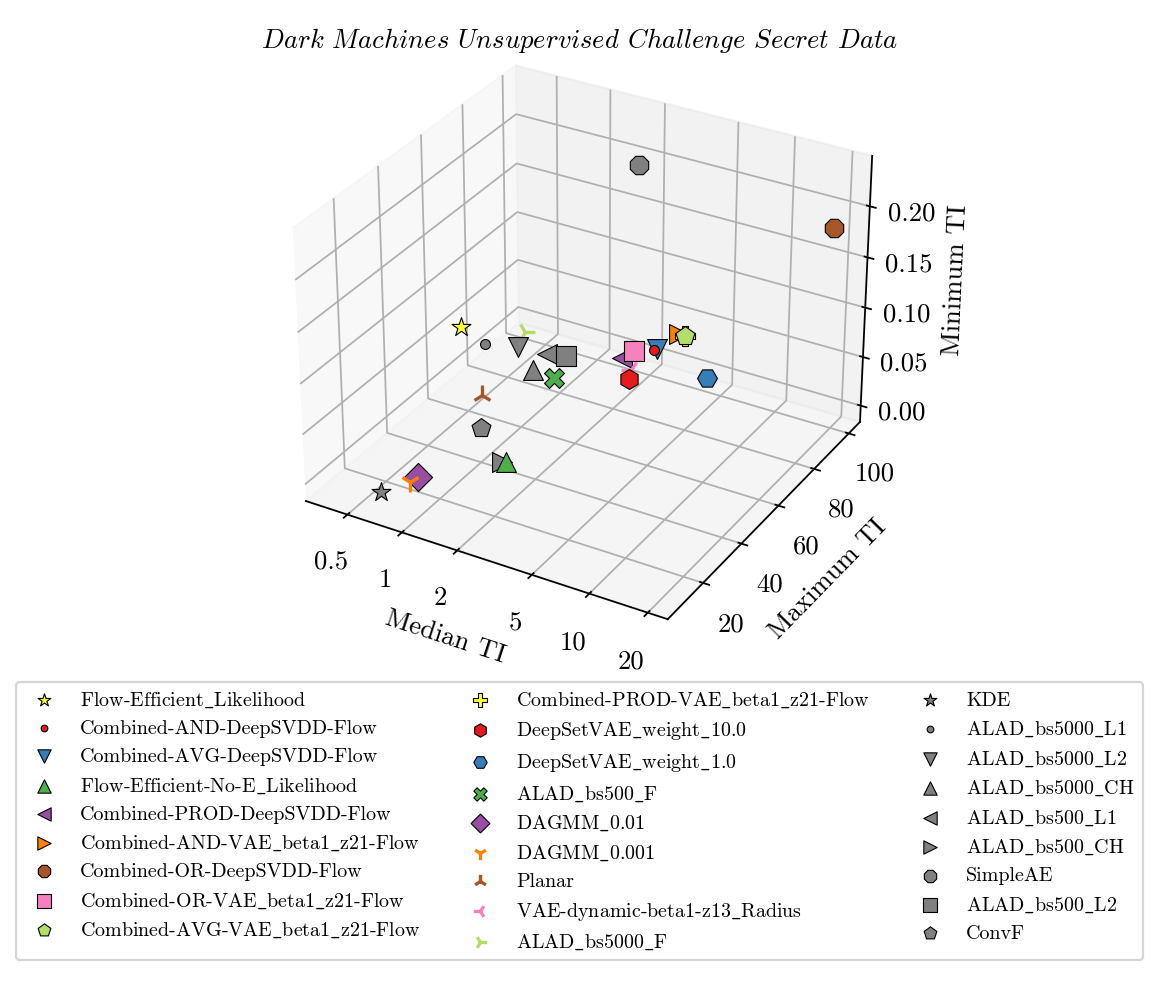

In [16]:
s=80
fig = plt.figure(figsize=(6, 8))
gs0 = gs.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.0)

ax = plt.subplot(gs0[0], projection='3d')
plt.title('$Dark$ $Machines$ $Unsupervised$ $Challenge$ $Secret$ $Data$', y=1.01, fontsize=12)
for kk, mod in enumerate(list(top_medians_top['ShortName'])):
    tmpdf2=inner_models[inner_models['ShortName'] == mod]
    print(kk, mod, np.log10(tmpdf2['MedianSigI'].values[0]), tmpdf2['MaxSigI'].values[0], tmpdf2['MinSigI'].values[0])
    ax.scatter(zs=tmpdf2['MinSigI'].values[0], 
               xs=np.log10(tmpdf2['MedianSigI'].values[0]),
               ys=tmpdf2['MaxSigI'].values[0],
               color=topcolors[kk%9], 
               marker=markerdict[kk],
               linewidths=lw if kk < 14 else 1.5,
               s=s,
               edgecolor='k' ,
#                alpha=0.5
              )

for kk, mod in enumerate(list(top_medians_compare['ShortName'])):
    tmpdf2=inner_models[inner_models['ShortName'] == mod]
    print(kk, mod, np.log10(tmpdf2['MedianSigI'].values[0]), tmpdf2['MaxSigI'].values[0], tmpdf2['MinSigI'].values[0])
    ax.scatter(zs=tmpdf2['MinSigI'], 
               xs=np.log10(tmpdf2['MedianSigI']),
               ys=tmpdf2['MaxSigI'],
               color='grey', 
               marker=markerdict[kk],
               linewidths=lw if kk < 14 else 5,
               s=s,
               edgecolor='k' 
              )

ax.set_zlabel('Minimum TI')


ax.set_xlabel('Median TI')
# plt.xlim(-1.3, np.log10(25))
plt.xticks([-1, np.log10(0.2), np.log10(0.5), 0, np.log10(2), np.log10(5), 1, np.log10(20)], [0.1, .2, .5, 1, 2, 5, 10, 20])
ax.set_ylabel('Maximum TI')
# plt.ylim(1, np.log10(120))
# plt.yticks([1, np.log10(20), np.log10(50), 2], [10, 20, 50, 100])

plt.subplot(gs0[1])
for kk, mod in enumerate(list(top_medians_top['ShortName'])):
    tmpdf2=SI_DF[SI_DF['Model'] == mod]
#     print(mod)
#     mod = mod.replace("_","$\_$")
    plt.scatter([], [], color=topcolors[kk%9],
                marker=markerdict[kk],
                label=mod,
                linewidths=lw if kk < 14 else 1.5,
                edgecolor='k'
               )
for kk, mod in enumerate(list(top_medians_compare['ShortName'])):
    tmpdf2=SI_DF[SI_DF['Model'] == mod]
#     mod = mod.replace("_","$\_$")
    plt.scatter([], [], color=f'grey',
                marker=markerdict[kk],
                label=mod,
                linewidths=lw if kk < 14 else 1.5,
                edgecolor='k'
               )
plt.axis('off')
plt.legend(fontsize=9,
           loc='center',
           ncol=3,
           labelspacing=0.5
          )
plt.savefig('../figures/3DProjectionSecretData.pdf', bbox_inches='tight')
plt.show()

In [17]:
inner_models.sort_values(by='MedianSigI', ascending=False)

,ShortName,Model,MinTotalImprovement,MedianTotalImprovement,MaxTotalImprovement,MinSigI,MaxSigI,MedianSigI
6,Combined-OR-DeepSVDD-Flow,Combined-OR-DeepSVDD-Flow,0.500000,6.300000,31.000000,0.183150,100.000000,19.022801
11,DeepSetVAE$\_$weight$\_$1.0,DeepSetVAE_beta_1.0_weight_1.0,0.027778,3.503583,16.906777,0.000000,99.111257,4.267101
8,Combined-AVG-VAE$\_$beta1$\_$z21-Flow,Combined-AVG-VAE_beta1_z21-Flow,0.100000,6.000000,69.000000,0.036630,99.103793,3.208368
9,Combined-PROD-VAE$\_$beta1$\_$z21-Flow,Combined-PROD-VAE_beta1_z21-Flow,0.100000,6.000000,69.000000,0.036630,99.103793,3.201316
5,Combined-AND-VAE$\_$beta1$\_$z21-Flow,Combined-AND-VAE_beta1_z21-Flow,0.100000,7.000000,66.000000,0.036630,99.082951,2.976848
24,SimpleAE,SimpleAE,0.203366,0.980306,39.600000,0.231669,81.554815,2.622997
2,Combined-AVG-DeepSVDD-Flow,Combined-AVG-DeepSVDD-Flow,0.800000,10.000000,97.000000,0.018315,97.558524,2.309711
1,Combined-AND-DeepSVDD-Flow,Combined-AND-DeepSVDD-Flow,0.316228,10.000000,79.000000,0.018315,96.905859,2.264734
10,DeepSetVAE$\_$weight$\_$10.0,DeepSetVAE_beta_1.0_weight_10.0,0.083333,3.747611,18.806492,0.000000,88.018433,2.025603
7,Combined-OR-VAE$\_$beta1$\_$z21-Flow,Combined-OR-VAE_beta1_z21-Flow,0.300000,6.300000,22.000000,0.018315,93.493151,1.900374


In [18]:
inner_models.query("MedianSigI > 2 and MedianTotalImprovement > 2").shape[0] / inner_models.query("MedianTotalImprovement > 2").shape[0]

0.4444444444444444

In [19]:
inner_models.query("MedianSigI > 2 and MedianTotalImprovement < 2").shape[0] / inner_models.query("MedianTotalImprovement <= 2").shape[0]

0.1111111111111111

In [20]:
inner_models['PerformaceDecrease'] = (inner_models['MedianTotalImprovement'] - inner_models['MedianSigI']) / inner_models['MedianTotalImprovement']

In [21]:
inner_models.sort_values(by='PerformaceDecrease', ascending=False)

,ShortName,Model,MinTotalImprovement,MedianTotalImprovement,MaxTotalImprovement,MinSigI,MaxSigI,MedianSigI,PerformaceDecrease
0,Flow-Efficient$\_$Likelihood,Flow-Efficient_Likelihood,0.900000,15.000000,54.000000,0.183150,10.000000,1.800652,0.879957
4,Combined-PROD-DeepSVDD-Flow,Combined-PROD-DeepSVDD-Flow,0.000000,7.905694,24.000000,0.000000,96.706961,1.506986,0.809380
1,Combined-AND-DeepSVDD-Flow,Combined-AND-DeepSVDD-Flow,0.316228,10.000000,79.000000,0.018315,96.905859,2.264734,0.773527
3,Flow-Efficient-No-E$\_$Likelihood,Flow-Efficient-No-E_Likelihood,0.316228,8.000000,53.000000,0.018315,29.428032,1.819026,0.772622
2,Combined-AVG-DeepSVDD-Flow,Combined-AVG-DeepSVDD-Flow,0.800000,10.000000,97.000000,0.018315,97.558524,2.309711,0.769029
17,ALAD$\_$bs5000$\_$F,ALAD_ld10_lr1e-5_bs5000_epoch2000_enc512_F_sc,0.277778,2.198707,17.403188,0.026371,84.326803,0.569260,0.741093
19,ALAD$\_$bs5000$\_$L1,ALAD_ld10_lr1e-5_bs5000_epoch2000_enc512_L_1,0.000000,1.403480,24.268647,0.015823,78.095040,0.388229,0.723381
7,Combined-OR-VAE$\_$beta1$\_$z21-Flow,Combined-OR-VAE_beta1_z21-Flow,0.300000,6.300000,22.000000,0.018315,93.493151,1.900374,0.698353
14,DAGMM$\_$0.001,DAGMM_10_1e-07_1000_0.001_0.01_50_15_8,0.000000,2.314542,6.512162,0.000000,16.438356,0.756048,0.673349
12,ALAD$\_$bs500$\_$F,ALAD_ld10_lr1e-5_bs500_epoch2000_enc512_F_sc,0.194444,2.851153,14.627000,0.000000,78.703094,0.954591,0.665191


 * The top 5 median TI models on the _secret data_ were among the top median performers on the _hackathon data_.
 * 8/9 of the models which have a median TI > 2 in the _secret data_ also had median TI > 2 in the _hackathon data_.

In [22]:
TopModels = inner_models.query('MedianTotalImprovement > 2 and MedianSigI > 2').sort_values(by='MedianSigI', ascending=False).copy()

In [23]:
TopModels['Hackathon Data Median TI'] = TopModels['MedianTotalImprovement']
TopModels['Secret Data Median TI'] = TopModels['MedianSigI']

In [24]:
for row in TopModels[['ShortName', 'Hackathon Data Median TI', 'Secret Data Median TI']].values:
#     print(row)
    for k in range(1, 3):
        row[k] = f'{row[k]:0.2f}'
    print(' & '.join(map(str,row)) + ' \\\\')

Combined-OR-DeepSVDD-Flow & 6.30 & 19.02 \\
DeepSetVAE$\_$weight$\_$1.0 & 3.50 & 4.27 \\
Combined-AVG-VAE$\_$beta1$\_$z21-Flow & 6.00 & 3.21 \\
Combined-PROD-VAE$\_$beta1$\_$z21-Flow & 6.00 & 3.20 \\
Combined-AND-VAE$\_$beta1$\_$z21-Flow & 7.00 & 2.98 \\
Combined-AVG-DeepSVDD-Flow & 10.00 & 2.31 \\
Combined-AND-DeepSVDD-Flow & 10.00 & 2.26 \\
DeepSetVAE$\_$weight$\_$10.0 & 3.75 & 2.03 \\
